In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_excel('max_ave_value_at_final_time_20240801.xlsx', engine='openpyxl')

In [3]:
df.head()

Defocus distance (mm)  Speed (mm/s)  Duty cycle (%)  Temperature (K)
0                      0            20             0.1       841.526784
1                      0            20             0.5      2128.620392
2                      0            20             1.0      3185.820565
3                      0            20             2.0      4474.071929
4                      0            20             5.0      7212.694259

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Defocus distance (mm)  1728 non-null   int64  
 1   Speed (mm/s)           1728 non-null   int64  
 2   Duty cycle (%)         1728 non-null   float64
 3   Temperature (K)        1728 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 54.1 KB


In [5]:
df.shape

(1728, 4)

In [6]:
# 分离特征和目标变量
X = df[['Defocus distance (mm)', 'Speed (mm/s)', 'Duty cycle (%)']]
# 修改 DataFrame 的列名，将 '/s' 替换为 LaTeX 格式的 's^{-1}'
X.columns = X.columns.str.replace(r'/s', r' s$^{-1}$', regex=True)
y = df['Temperature (K)']

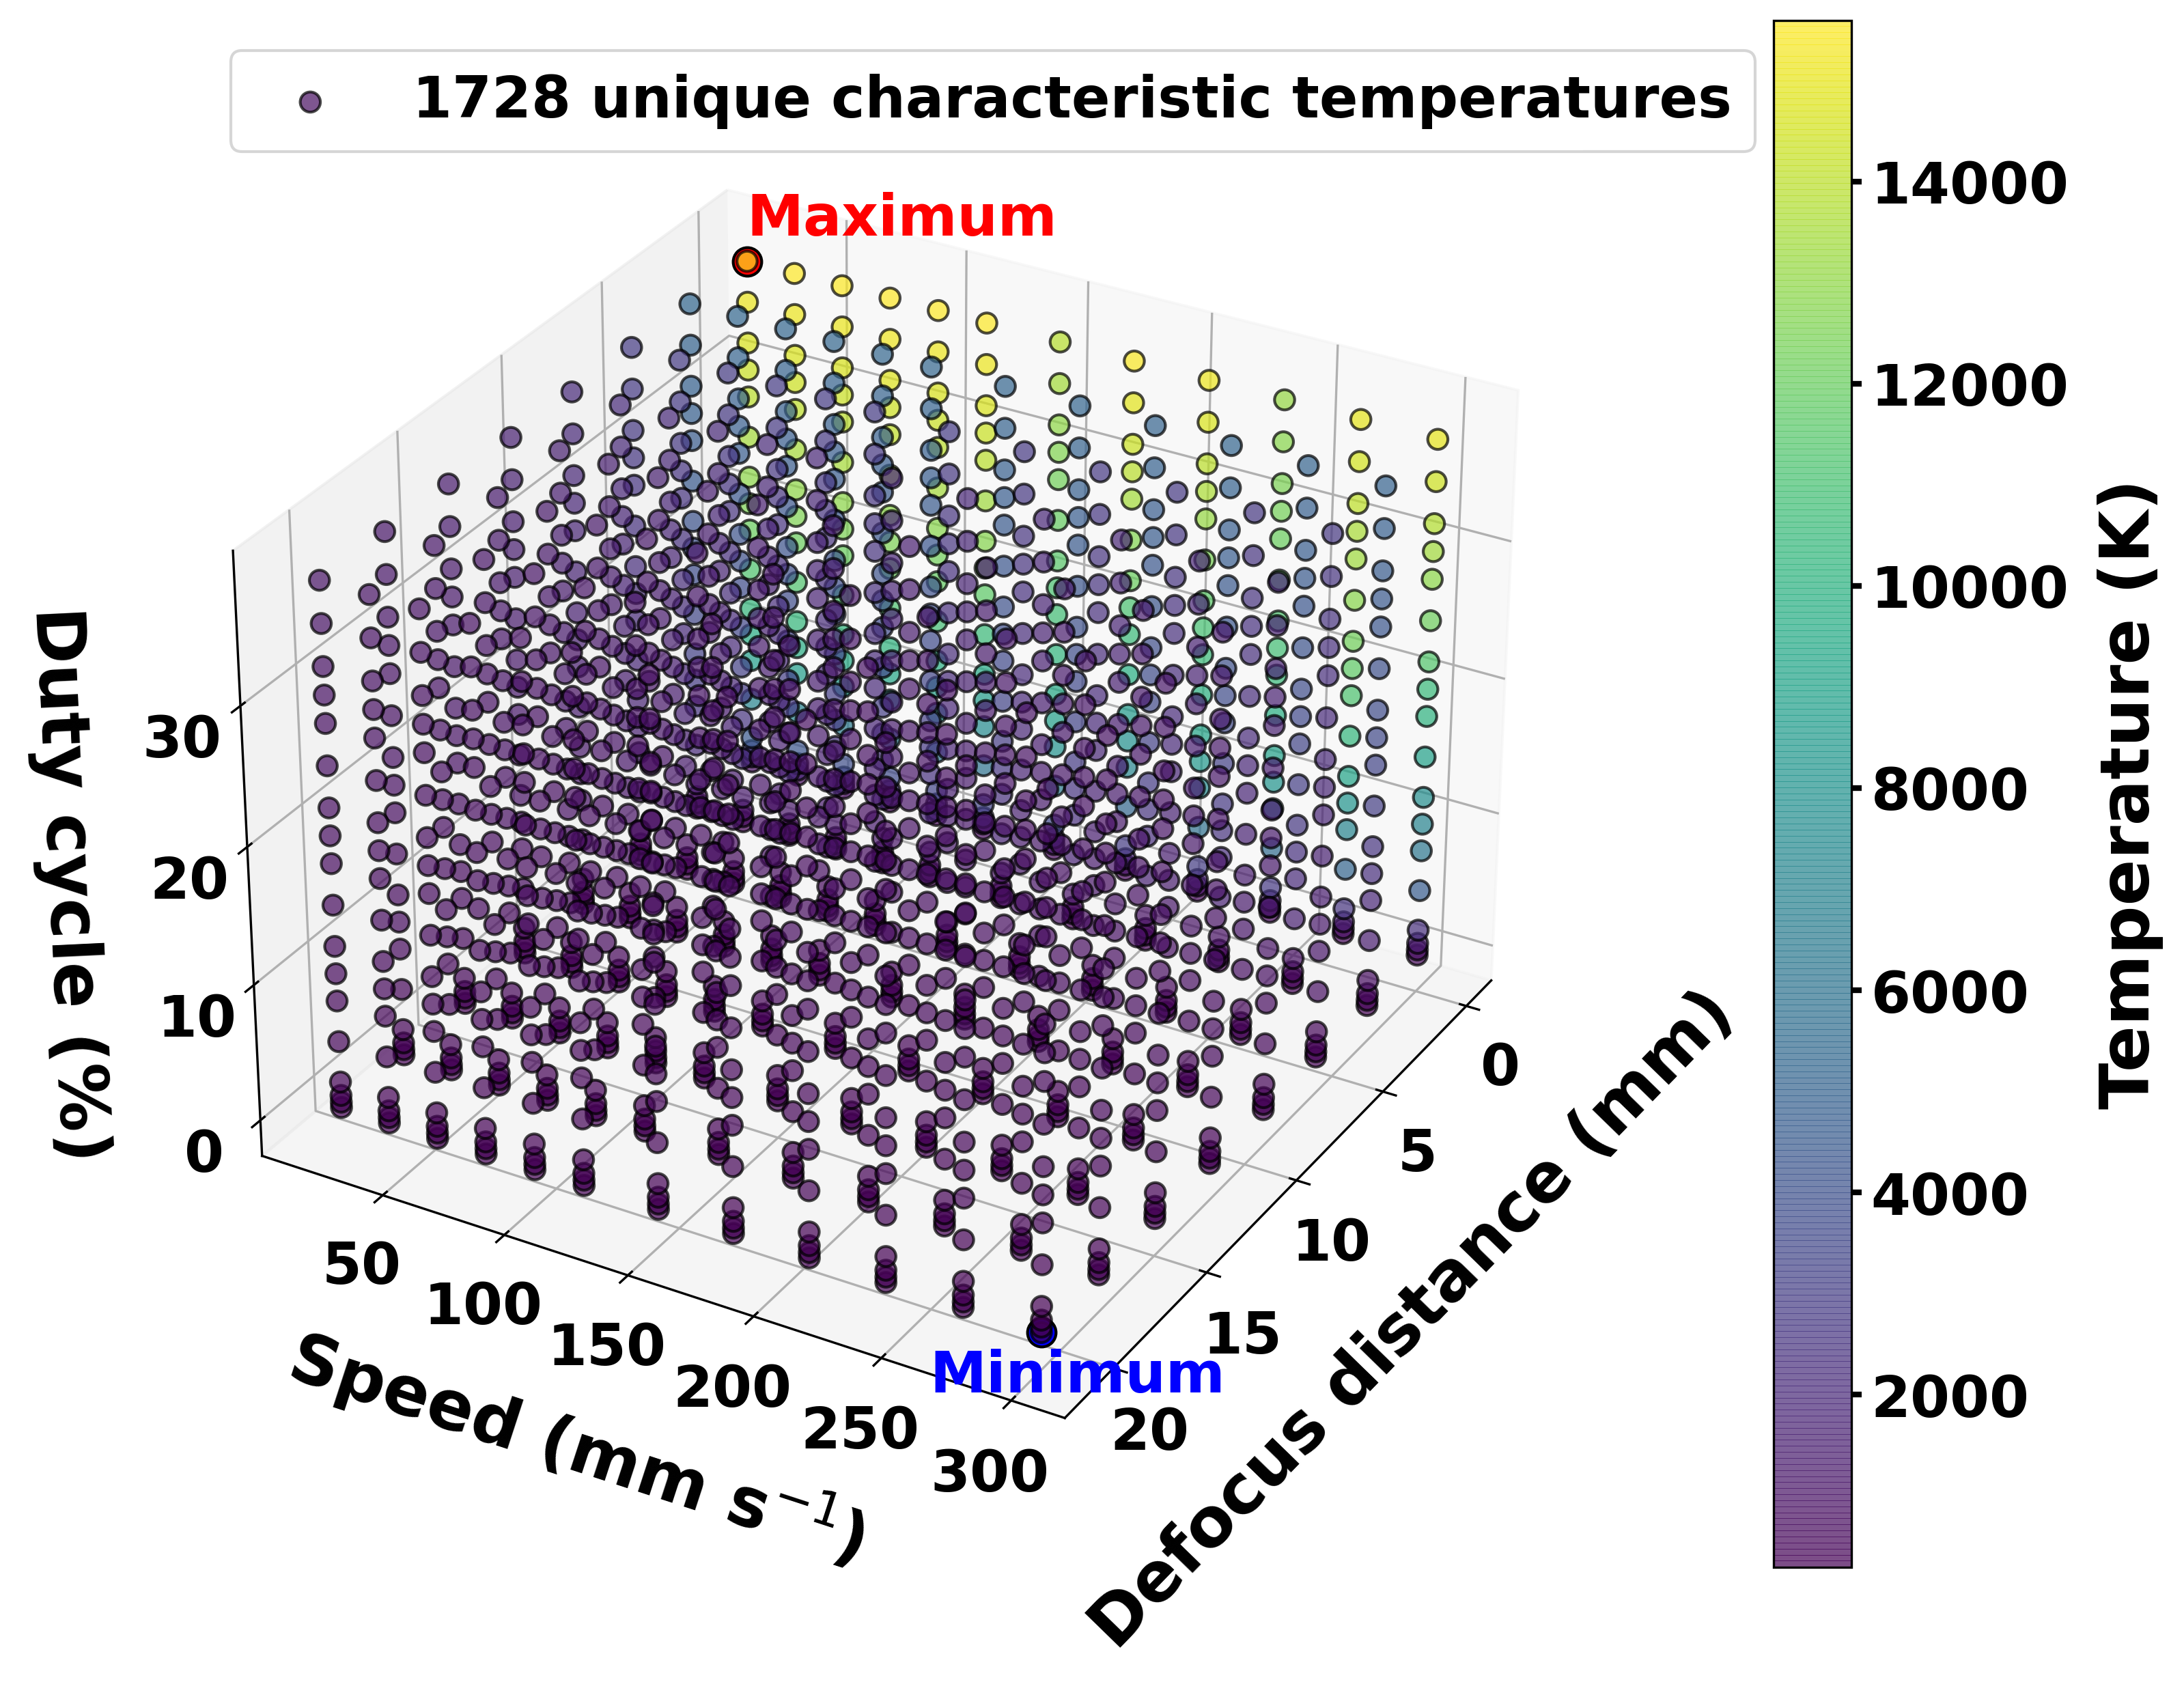

In [7]:

from mpl_toolkits.mplot3d import Axes3D

# 假设特征数据为 X (DataFrame格式)，包含三个特征
feature1 = X.columns[0]
feature2 = X.columns[1]
feature3 = X.columns[2]

# 定位最高能量点和最低能量点
highest_energy_point = [X[feature1].min(), X[feature2].min(), X[feature3].max()]
lowest_energy_point = [X[feature1].max(), X[feature2].max(), X[feature3].min()]

# 绘制三维散点图
def plot_3d_scatter(X, y, highest_point, lowest_point):
    fig = plt.figure(figsize=(12, 10), dpi=300)
    ax = fig.add_subplot(111, projection='3d')

    # 绘制散点
    scatter = ax.scatter(X[feature1], X[feature2], X[feature3], c=y, cmap='viridis', edgecolor='k', s=50, alpha=0.7, label='1728 unique characteristic temperatures')
    
    # 设置标题和标签，可以固定使用
    # ax.set_title('3D Feature Space Visualization', fontsize=20, weight='bold')
    ax.set_xlabel(feature1, fontsize=24, weight='bold', labelpad=20)
    ax.set_ylabel(feature2, fontsize=24, weight='bold', labelpad=20)
    ax.set_zlabel(feature3, fontsize=24, weight='bold', labelpad=15)
    
   # 放大和加粗刻度标签，可以固定使用
    ax.tick_params(axis='both', which='major', labelsize=20, width=2)
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_fontweight('bold')
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_fontweight('bold')
    for tick in ax.zaxis.get_major_ticks():
        tick.label.set_fontsize(20)
        tick.label.set_fontweight('bold')

   # 添加颜色条
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label('Temperature (K)', fontsize=24, weight='bold', labelpad=10)
    # 设置颜色条刻度标签字体大小和加粗
    cbar.ax.yaxis.set_tick_params(labelsize=20, width=2)
    for label in cbar.ax.get_yticklabels():
        label.set_fontsize(20)
        label.set_fontweight('bold')

    # 标记最高能量点
    ax.scatter(*highest_point, color='red', s=100, edgecolor='k', label=None)
    ax.text(highest_point[0], highest_point[1], highest_point[2]*1.05, 'Maximum', color='red', fontsize=20, weight='bold', backgroundcolor='None')

    # 标记最低能量点
    ax.scatter(*lowest_point, color='blue', s=100, edgecolor='k', label=None)
    ax.text(lowest_point[0]*1.175, lowest_point[1]*0.95, lowest_point[2], 'Minimum', color='blue', fontsize=20, weight='bold', backgroundcolor='None')

    # 设置网格和其他美化选项
    ax.grid(True)
    ax.view_init(elev=30, azim=30)  # 设置视角

    # 调整图例位置，避免与数据点重叠
    ax.legend(loc='upper right', fontsize=16, bbox_to_anchor=(1.14, 1.04), prop={'size': 20, 'weight': 'bold'})
    
    plt.show()

# 调用函数绘制3D散点图
plot_3d_scatter(X, y, highest_energy_point, lowest_energy_point)

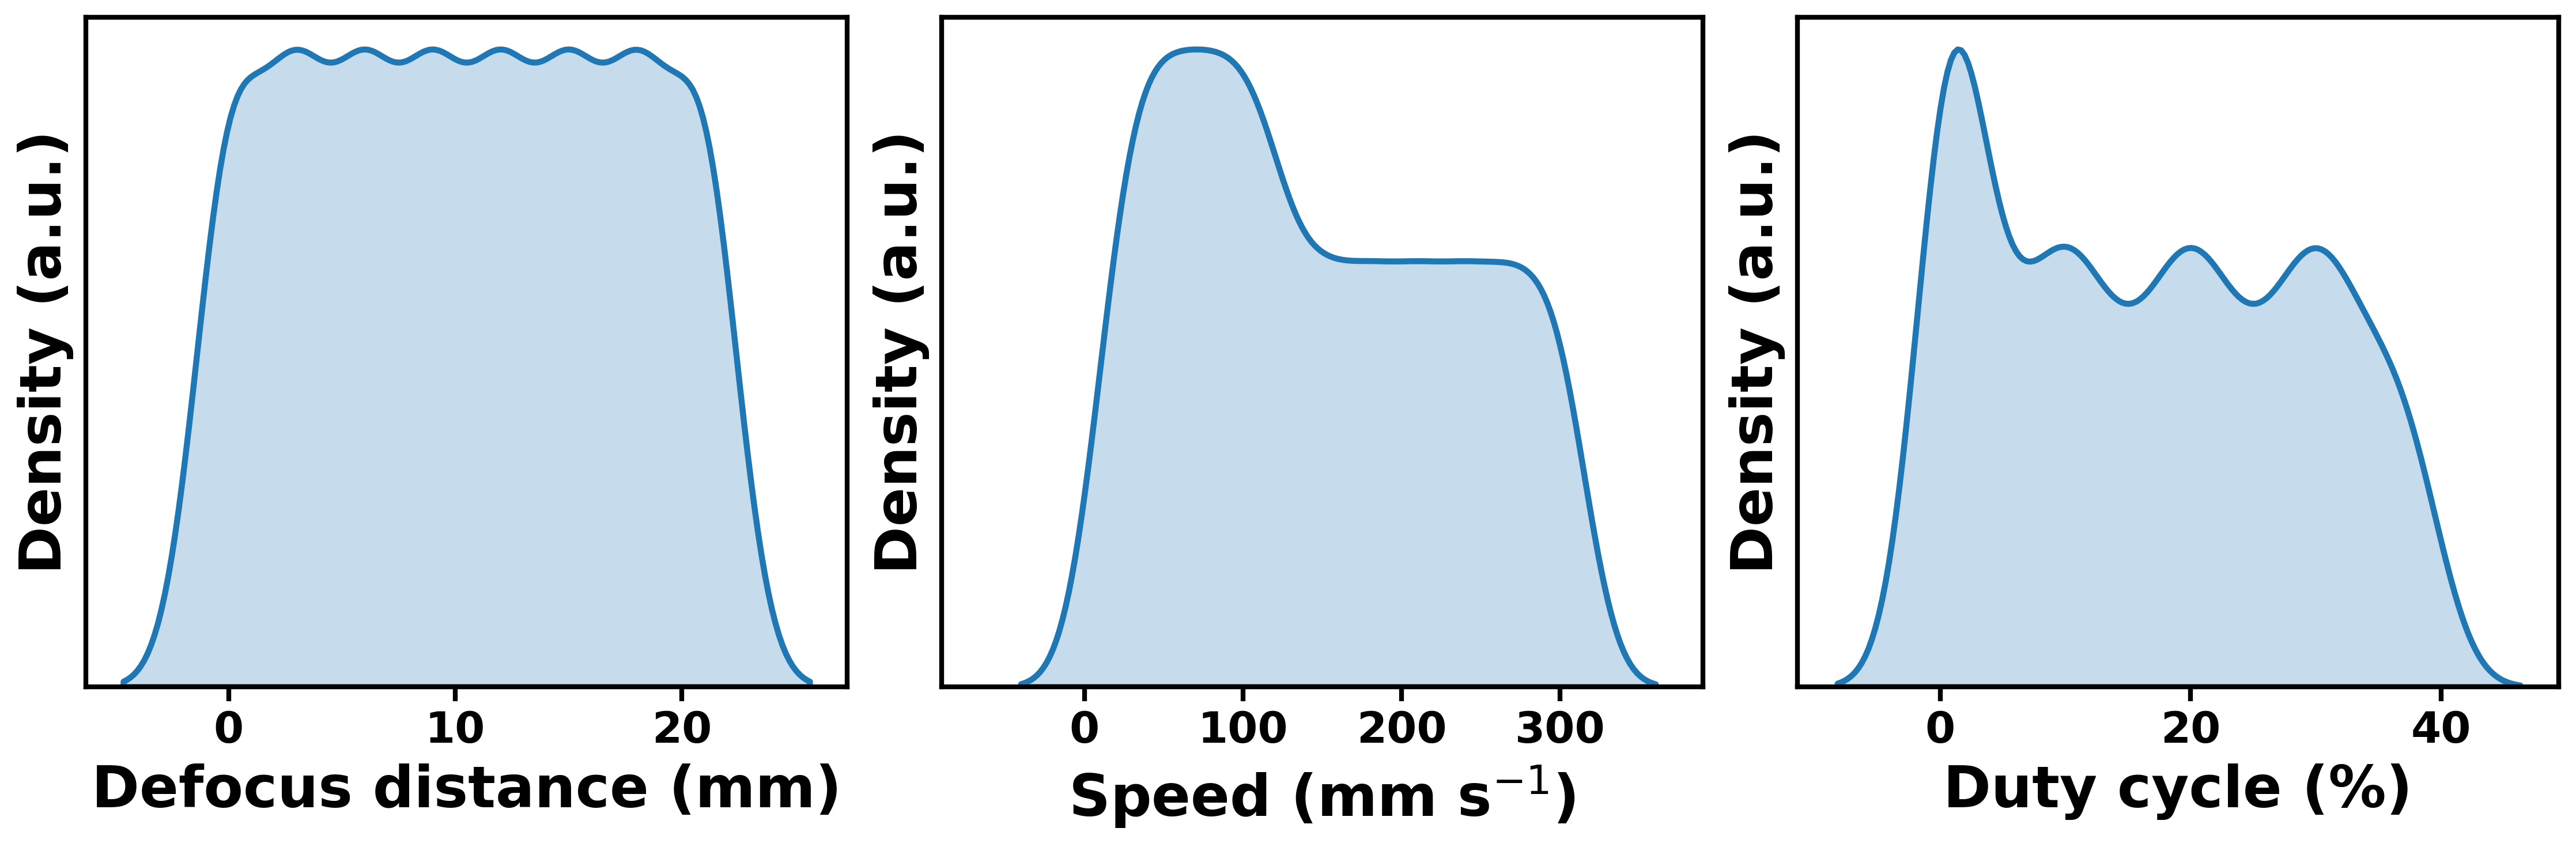

In [8]:
#特征的KDE图（Kernel Density Estimation plot，核密度估计图）是一种用于估计和可视化数据分布的平滑曲线图。
#它通过核密度估计方法来估计概率密度函数，提供了相对于直方图更加平滑和连续的分布曲线。
#KDE图有助于理解数据的分布模式、峰值位置、数据集中区域以及是否存在多个模式或峰值。


# 绘制特征KDE图
def plot_kde(X):
    num_features = X.shape[1]
    fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5), dpi=300)
    
    for i, col in enumerate(X.columns):
        # 绘制KDE图，增加线条宽度
        sns.kdeplot(data=X, x=col, ax=axes[i], shade=True, linewidth=2.5)
        
        # X轴和Y轴标签
        axes[i].set_xlabel(col, fontsize=24, weight='bold', labelpad=5)
        axes[i].set_ylabel('Density (a.u.)', fontsize=24, weight='bold', labelpad=5)  # Y轴标记为Density (a.u.)

        # 动态设置x轴范围，根据每个特征的最小值和最大值设置范围
        x_min, x_max = X[col].min(), X[col].max()
        axes[i].set_xlim(-0.3*x_max, x_max + 0.3 * abs(x_max))  # 增加10%的余量

        # 刻度字体大小和加粗
        axes[i].tick_params(axis='both', which='major', labelsize=16, width=2, length=6)

        # X轴刻度标签字体设置
        for tick in axes[i].get_xticklabels():
            tick.set_fontsize(18)
            tick.set_weight('bold')

        # 移除Y轴刻度
        axes[i].set_yticks([])

        # 加粗边框
        for spine in axes[i].spines.values():
            spine.set_linewidth(2)  # 将边框线条设置为2像素宽，可以根据需要调整

        # 网格
        axes[i].grid(False)
    # 添加总标题
    #plt.suptitle('Variable Distribution KDE Plots', fontsize=24, weight='bold', y=0.975)
    plt.tight_layout()
    # plt.savefig('C:/Users/YourUsername/Desktop/kde_plots.png', dpi=300)
    plt.show()

# 调用函数绘制KDE图，默认不显示 y 轴刻度
plot_kde(X)

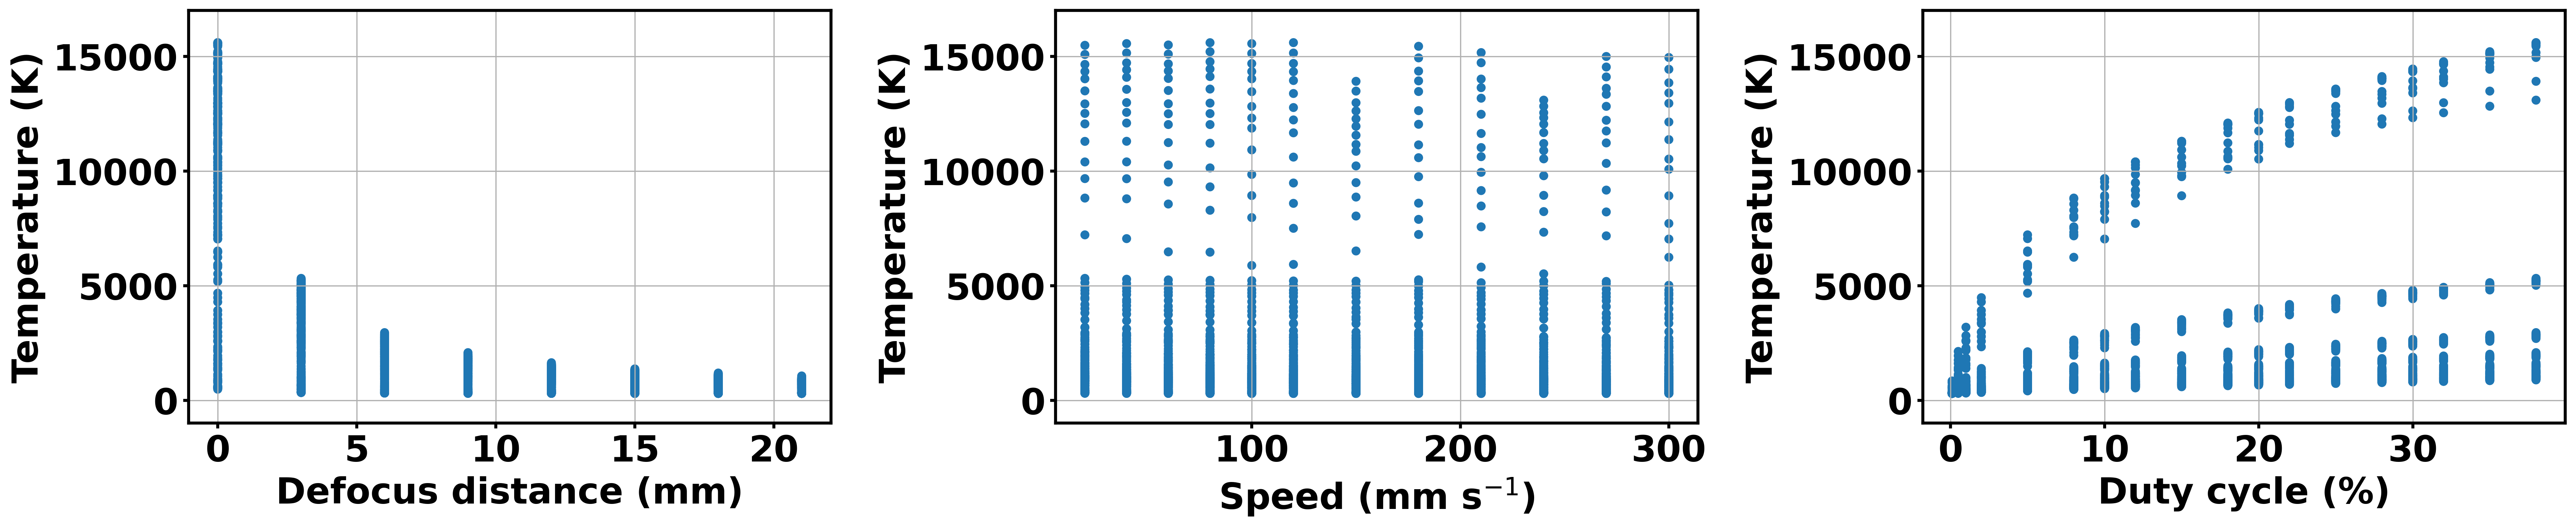

In [9]:
# 绘制特征与目标关系散点图
def plot_feature_target_scatter(X, y):
    num_features = X.shape[1]
    fig, axes = plt.subplots(1, num_features, figsize=(8 * num_features, 5), dpi=300)
    
    for i, col in enumerate(X.columns):
        sns.scatterplot(x=X[col], y=y, ax=axes[i], alpha=1, edgecolor='None')
        #axes[i].set_title(f'{col} vs Temperature', fontsize=16, weight='bold', pad=20)
        axes[i].set_xlabel(col, fontsize=24, weight='bold', labelpad=5)
        axes[i].set_ylabel('Temperature (K)', fontsize=24, weight='bold', labelpad=5)
        axes[i].grid(True)
        axes[i].set_ylim(-1000, 17000)

        # 放大和加粗刻度标签
        axes[i].tick_params(axis='both', which='major', labelsize=24, width=2)#字体大小可以设置
        for tick in axes[i].xaxis.get_major_ticks():
            # tick.label.set_fontsize(16)
            tick.label.set_fontweight('bold')#但是加粗只能遍历tick才能实现
        for tick in axes[i].yaxis.get_major_ticks():
            # tick.label.set_fontsize(16)
            tick.label.set_fontweight('bold')

        # 加粗边框
        for spine in axes[i].spines.values():
            spine.set_linewidth(2)

    
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.35, hspace=0)
    # plt.savefig('C:/Users/YourUsername/Desktop/feature_target_scatter.png', dpi=300)
    plt.show()

# 调用函数绘制特征与目标关系散点图
plot_feature_target_scatter(X, y)


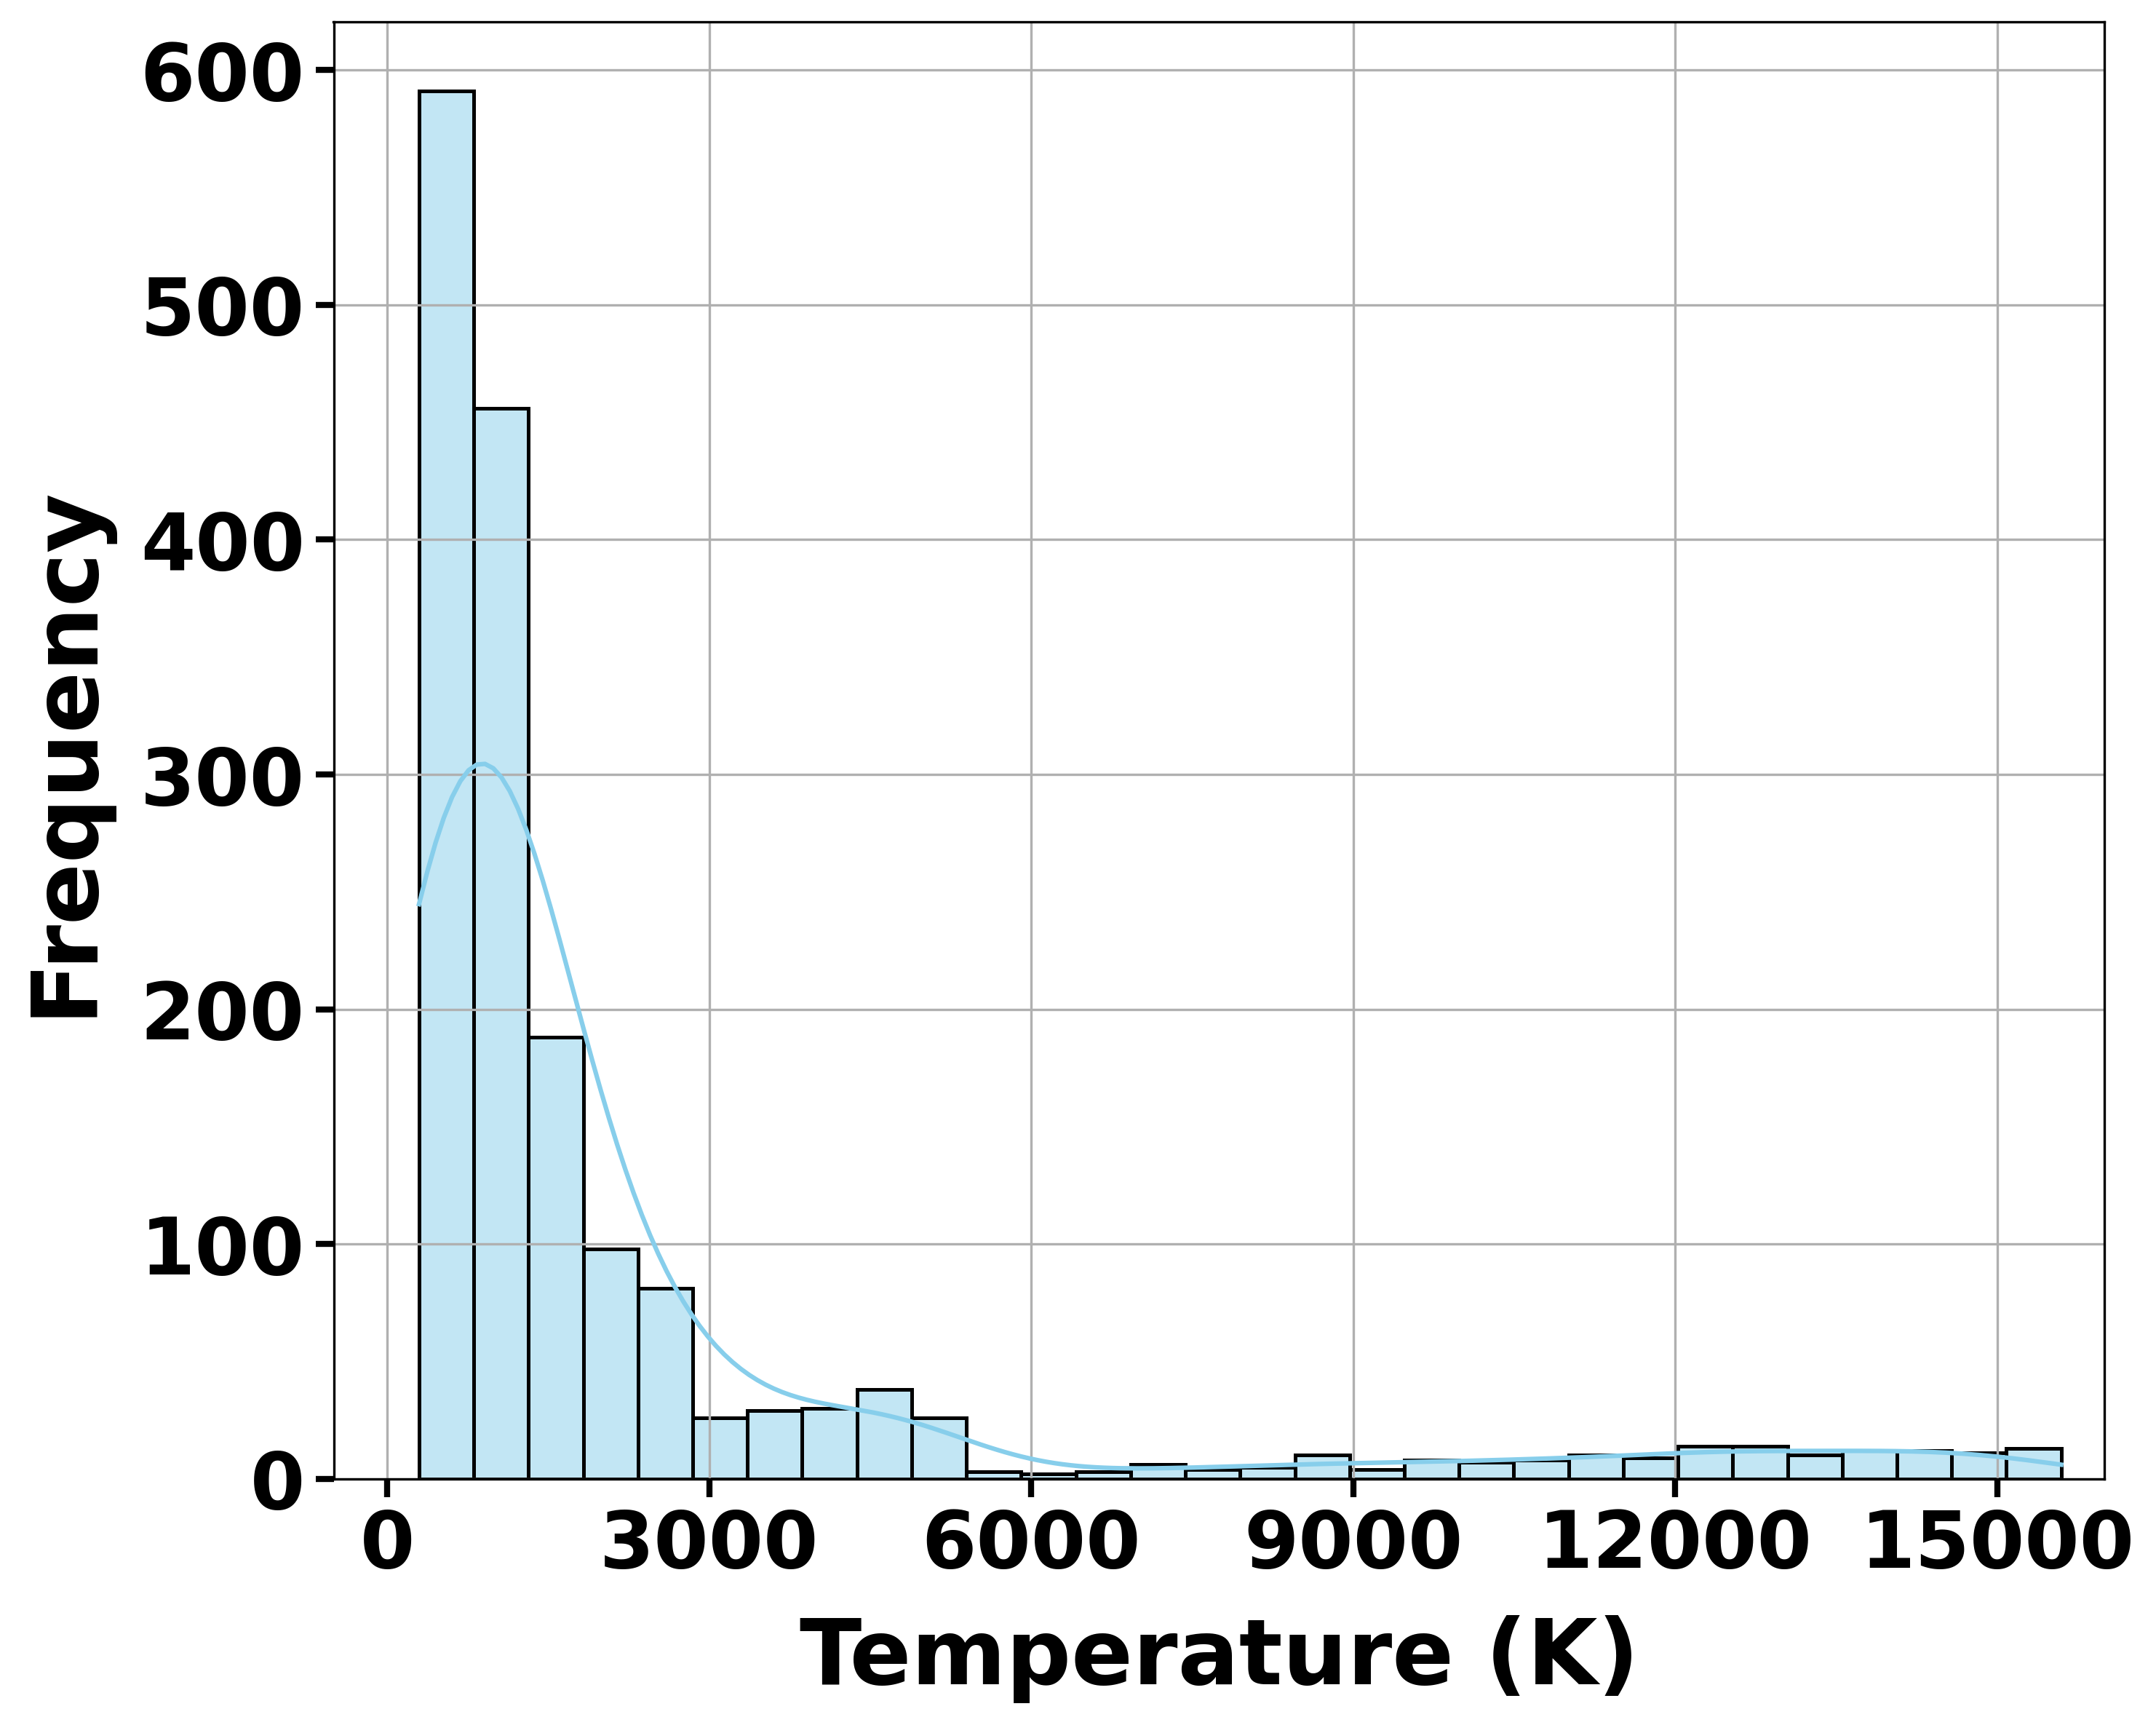

In [10]:
# 绘制目标值分布直方图
def plot_target_distribution(y):
    plt.figure(figsize=(10, 8), dpi=300)
    
    # 目标值分布直方图
    sns.histplot(y, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
    #plt.title('Temperature Distribution', fontsize=20, weight='bold', pad=15)
    plt.xlabel('Temperature (K)', fontsize=30, weight='bold', labelpad=10)
    plt.ylabel('Frequency', fontsize=30, weight='bold', labelpad=10)
    plt.tick_params(axis='x', labelsize=26, width=2, length=6)
    plt.tick_params(axis='y', labelsize=26, width=2, length=6)

    # 设置x轴范围
    plt.xlim(-500, 16000)
    # 加粗刻度标签
    plt.xticks(range(0, 16000, 3000), fontsize=26, weight='bold')
    plt.yticks(fontsize=26, weight='bold')
    
    plt.grid(True)
    
    plt.tight_layout()
    # plt.savefig('C:/Users/YourUsername/Desktop/temperature_distribution.png', dpi=300)
    plt.show()

# 调用函数绘制目标值分布直方图
plot_target_distribution(y)

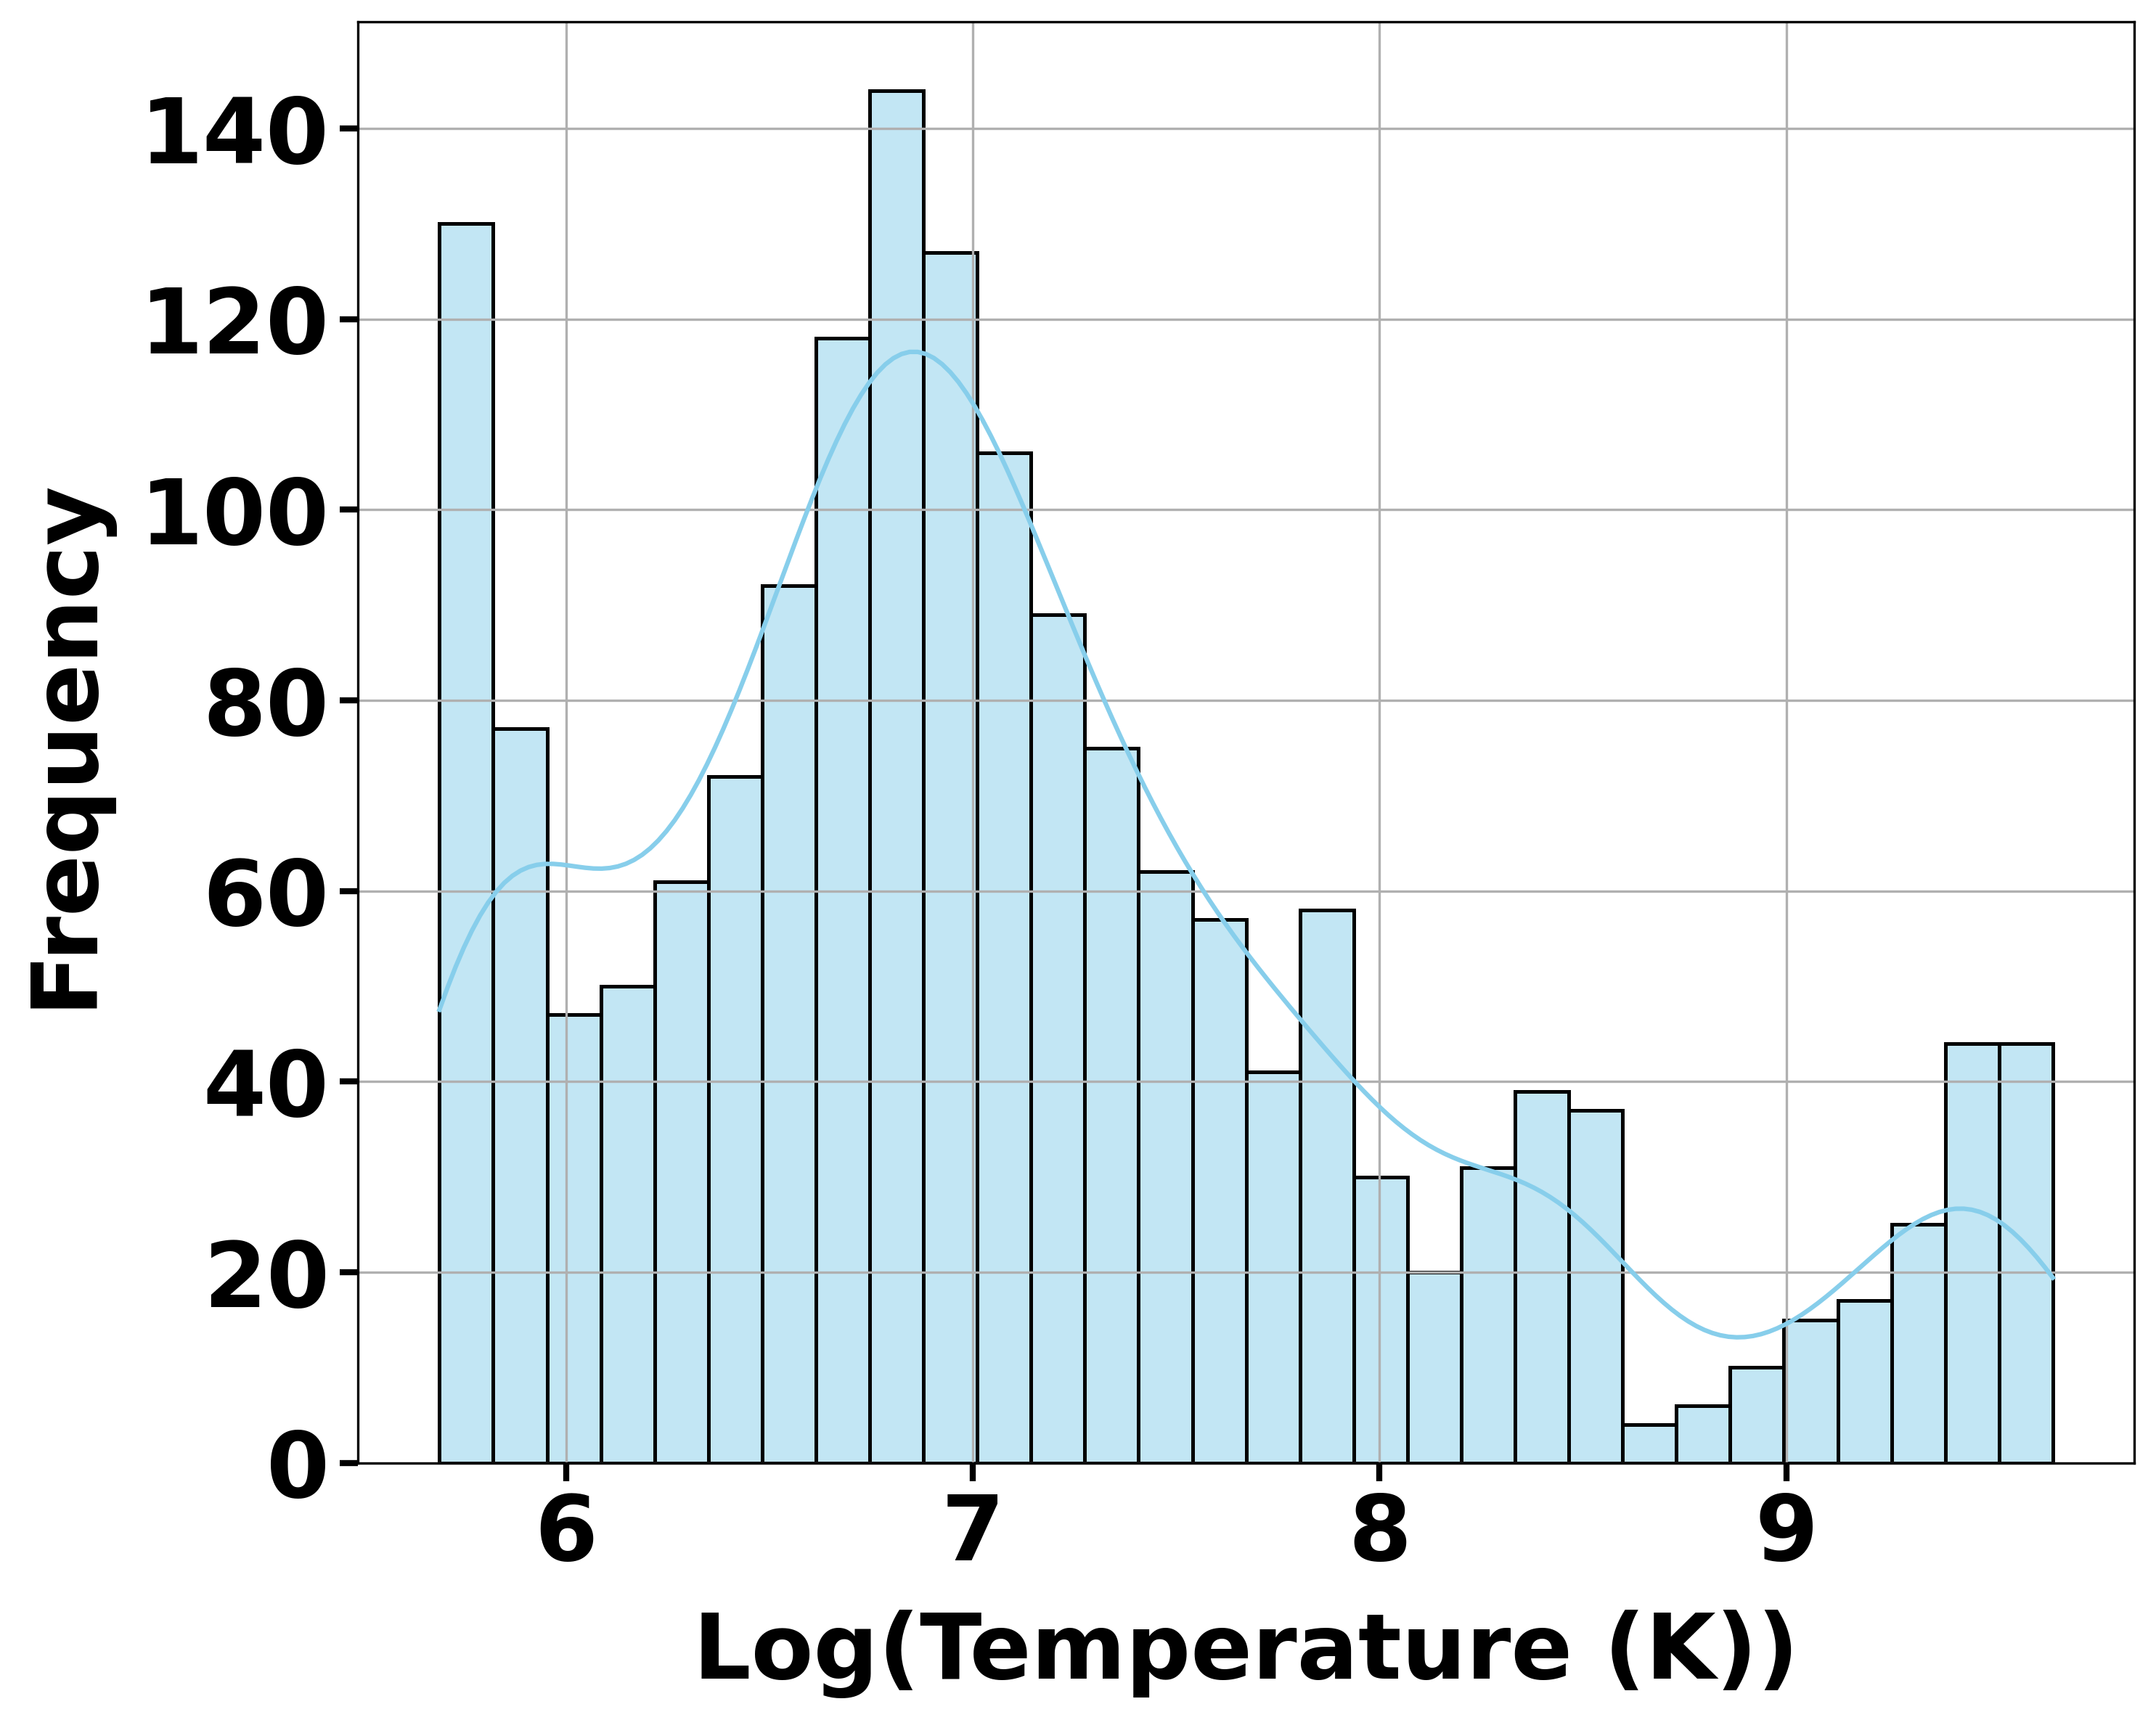

In [11]:
# 对目标变量进行对数转换，确保没有负值或零值的情况
y_log = np.log(y)

# 再次可视化对数处理后的目标值分布
def plot_target_distribution_log(y_log):
    plt.figure(figsize=(10, 8), dpi=300)
    
    # 目标值分布直方图
    sns.histplot(y_log, bins=30, kde=True, color='skyblue', edgecolor='black', linewidth=1.2)
    plt.xlabel('Log(Temperature (K))', fontsize=30, weight='bold', labelpad=10)
    plt.ylabel('Frequency', fontsize=30, weight='bold', labelpad=10)
    plt.tick_params(axis='x', labelsize=26, width=2, length=6)
    plt.tick_params(axis='y', labelsize=26, width=2, length=6)

    # 设置x轴范围可以根据具体情况调整
    plt.xlim(min(y_log)-0.2, max(y_log)+0.2)
    plt.xticks(range(6, 10, 1), fontsize=30, weight='bold')
    plt.yticks(fontsize=30, weight='bold')
    
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 调用函数绘制对数处理后的目标值分布直方图
plot_target_distribution_log(y_log)

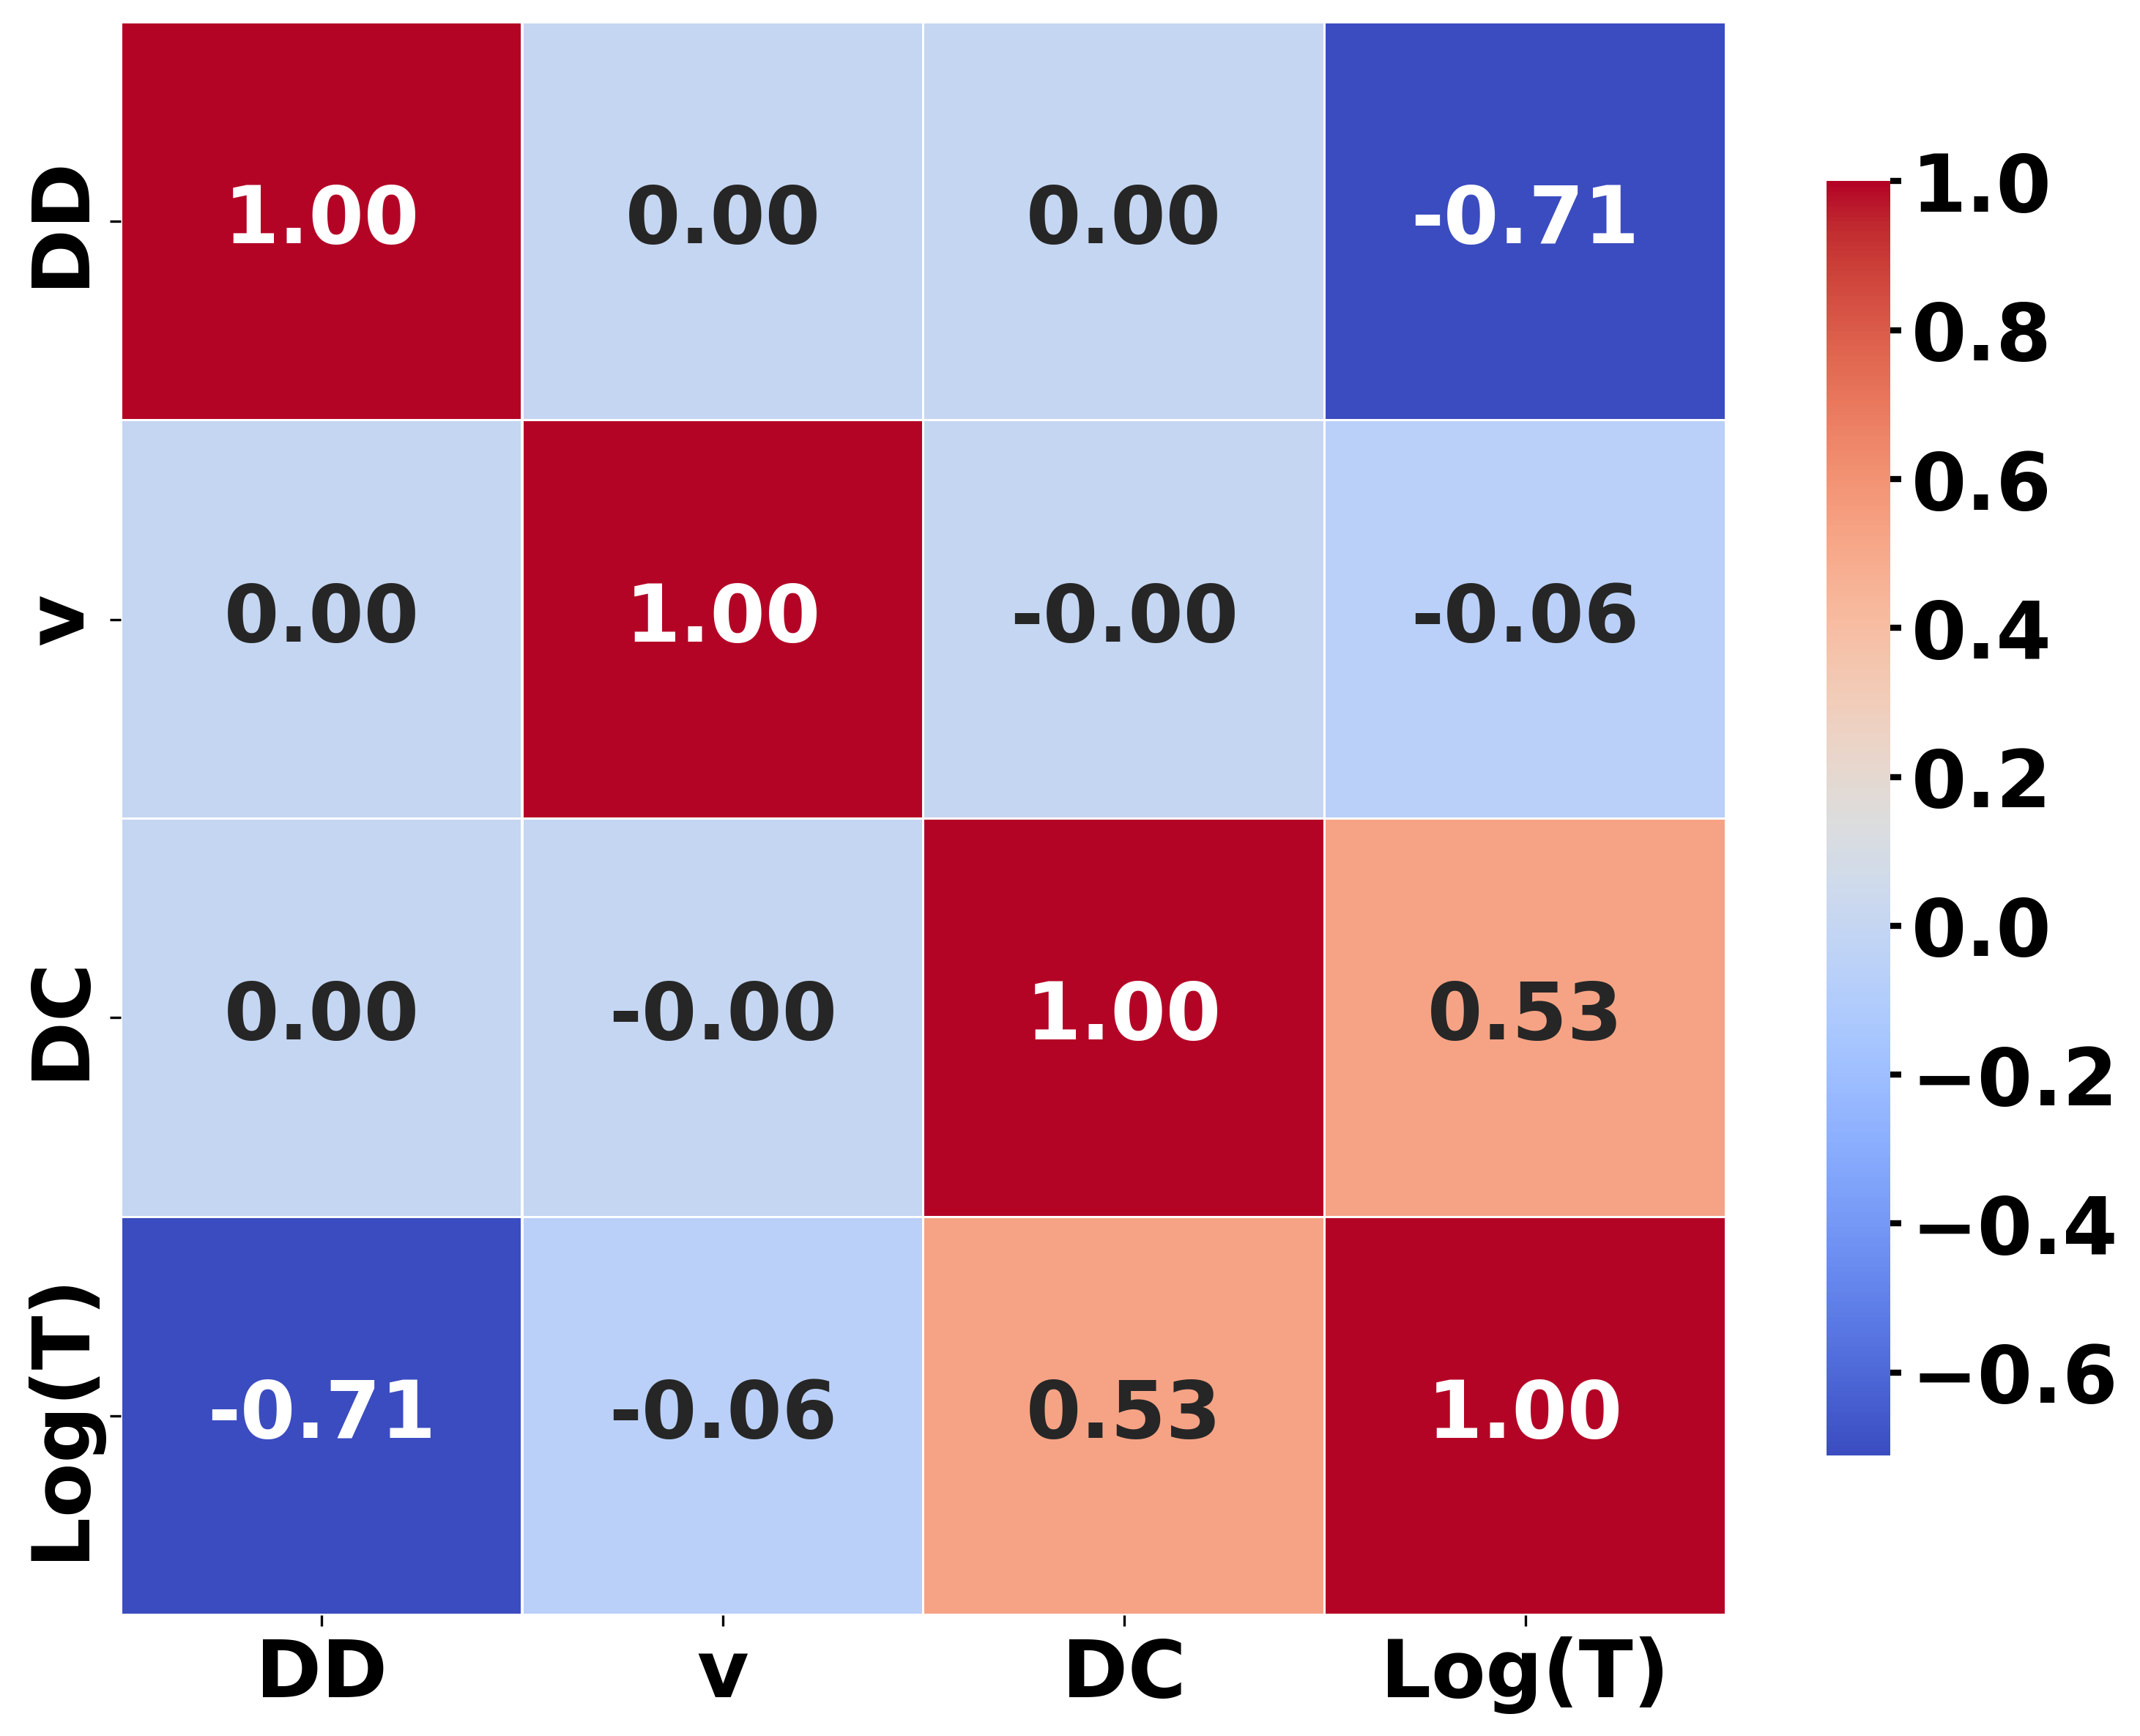

In [12]:
# 将 y_log 添加到特征矩阵 X 中
X_with_log_y = X.copy()
X_with_log_y['y_log'] = y_log  # 正确标记为 y_log

# 自定义特征名称
custom_labels = ['DD', 'v', 'DC', 'Log(T)']

# 绘制特征相关性矩阵热力图
def plot_correlation_matrix_with_custom_labels(X_with_log_y, custom_labels):
    plt.figure(figsize=(10, 8), dpi=300)
    
    # 计算相关性矩阵
    correlation_matrix = X_with_log_y.corr()
    
    # 绘制热力图
    heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, 
                          cbar_kws={'shrink': .8}, annot_kws={"size": 26, "weight": 'bold'})  # 加粗方框内文字
    #plt.title('Correlation Matrix', fontsize=30, weight='bold', pad=15)
    
    # 设置x轴和y轴刻度标签
    heatmap.set_xticklabels(custom_labels, fontsize=26, weight='bold')
    heatmap.set_yticklabels(custom_labels, fontsize=26, weight='bold')

    # 设置颜色条刻度标签字体大小和加粗
    cbar = heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=14, width=2)
    for label in cbar.ax.get_yticklabels():
        label.set_fontsize(26)
        label.set_weight('bold')

    plt.tight_layout()
    # plt.savefig('C:/Users/YourUsername/Desktop/correlation_matrix_with_custom_labels.png', dpi=300)
    plt.show()

# 调用函数绘制相关性矩阵热力图，包含自定义的特征标签
plot_correlation_matrix_with_custom_labels(X_with_log_y, custom_labels)